In [15]:
import numpy as np
from markov.cc_markov import MarkovChain
import random 
import copy
import pandas as pd
path_real='real/'

In [16]:
test_dataset=pd.DataFrame()
result_data1frame=pd.read_csv(path_real+'dataset1_news.csv')
result_data2frame=pd.read_csv(path_real+'dataset2_news.csv')
result_data3frame=pd.read_csv(path_real+'dataset3_news.csv')
result_data4frame=pd.read_csv(path_real+'dataset4_news.csv')
test_dataset=pd.concat([test_dataset,result_data1frame]).reset_index(drop=True)
test_dataset=pd.concat([test_dataset,result_data2frame]).reset_index(drop=True)
test_dataset=pd.concat([test_dataset,result_data3frame]).reset_index(drop=True)
test_dataset=pd.concat([test_dataset,result_data4frame]).reset_index(drop=True)
test_dataset.sample(frac=1).reset_index(drop=True)
print(len(test_dataset))
mc = MarkovChain(num_key_words=4)
for i in range (0, len(test_dataset['News'])):
    mc.add_string(str(test_dataset['News'][i]))
test_dataset=pd.DataFrame()
for j in range (0,400):
    stroka=''
    if j%50==0:
        print(j)
    for o in range(0,20):
        elem=mc.generate_text(max_length=random.randint(8,15))
        for i in range (0, len(elem)):
            el=copy.deepcopy(elem[i].replace('\xad',''))
            if i<len(elem)-1 and i>0:
                stroka=stroka+el+" "
            elif i==0:
                stroka=stroka+el[0].upper()+el[1:]+" "
            else:
                stroka=stroka+el+"."
    test_dataset=pd.concat([test_dataset,pd.DataFrame({'News':[copy.deepcopy(stroka)],'InfSec':[0],'FAKE?':[1],'Link':['https://www.fakenews.ru']})]).reset_index(drop=True)
    
test_dataset

1600
0
50
100
150
200
250
300
350


,News,InfSec,FAKE?,Link
0,Еще 3 недели назад закрепив предупреждение о х...,0,1,https://www.fakenews.ru
1,Высокой производительностью и надежностью мног...,0,1,https://www.fakenews.ru
2,Дополнительных пейлоадов полученных с удаленно...,0,1,https://www.fakenews.ru
3,Вузов со временем придется пересмотреть свои к...,0,1,https://www.fakenews.ru
4,Того минувшим летом apple столкнулась с пробле...,0,1,https://www.fakenews.ru
...,...,...,...,...
395,Также глобальном дефиците чипов который остает...,0,1,https://www.fakenews.ru
396,Шальных денег станет значительно меньше» в кон...,0,1,https://www.fakenews.ru
397,Функционировать даже после того как пользовате...,0,1,https://www.fakenews.ru
398,В своей истории за ними наблюдали свыше 127 ты...,0,1,https://www.fakenews.ru


In [17]:
test_dataset=pd.concat([test_dataset,result_data1frame.head(50)]).reset_index(drop=True)
test_dataset=pd.concat([test_dataset,result_data1frame.tail(50)]).reset_index(drop=True)

test_dataset=pd.concat([test_dataset,result_data2frame.head(50)]).reset_index(drop=True)
test_dataset=pd.concat([test_dataset,result_data2frame.tail(50)]).reset_index(drop=True)

test_dataset=pd.concat([test_dataset,result_data3frame.head(50)]).reset_index(drop=True)
test_dataset=pd.concat([test_dataset,result_data3frame.tail(50)]).reset_index(drop=True)

test_dataset=pd.concat([test_dataset,result_data4frame.head(50)]).reset_index(drop=True)
test_dataset=pd.concat([test_dataset,result_data4frame.tail(50)]).reset_index(drop=True)
# перемешать
test_dataset.sample(frac=1).reset_index(drop=True)
for i in range(0, len(test_dataset['News'])):
    u=test_dataset['News'].iloc[i]
    u=u.replace('Alexander Antipov', '')
    u=u.replace('alexander antipov', '')
    test_dataset.loc[i,'News']=copy.deepcopy(u)
test_dataset.sample(frac=1).reset_index(drop=True)
test_dataset.to_csv('corrrect_dataset.csv', encoding='utf-8', index=False)

In [18]:
test_dataset

,News,InfSec,FAKE?,Link
0,Еще 3 недели назад закрепив предупреждение о х...,0,1,https://www.fakenews.ru
1,Высокой производительностью и надежностью мног...,0,1,https://www.fakenews.ru
2,Дополнительных пейлоадов полученных с удаленно...,0,1,https://www.fakenews.ru
3,Вузов со временем придется пересмотреть свои к...,0,1,https://www.fakenews.ru
4,Того минувшим летом apple столкнулась с пробле...,0,1,https://www.fakenews.ru
...,...,...,...,...
795,Хакерская группировка из Нигерии годами атакуе...,0,0,https://www.securitylab.ru/news/529909.php
796,Neuralink опровергла обвинения в жестоком обра...,0,0,https://www.securitylab.ru/news/529898.php
797,74% доходов от вымогательского ПО приходится н...,0,0,https://www.securitylab.ru/news/529895.php
798,NFT-платформа Cent заблокировала транзакции из...,0,0,https://www.securitylab.ru/news/529829.php


<AxesSubplot:>

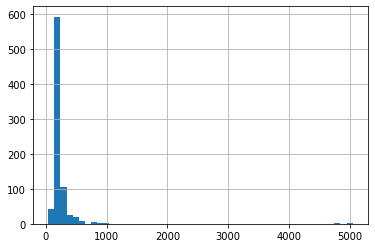

In [19]:
text = pd.read_csv('corrrect_dataset.csv')['News'].astype('str')
seq_len1 = [len(str(i).split()) for i in text]
pd.Series(seq_len1).hist(bins = 50)